In [1]:
from datetime import datetime
import pandas as pd
import numpy as np 

In [2]:
file1 = 'all dfs/for X/Айкун_неправильно.txt'
df1 = pd.read_csv(file1, 
                  delimiter=',')
file2 = 'all dfs/for X/Айкун_правильно.txt'
df2 = pd.read_csv(file2, 
                  delimiter=',')
file3 = 'all dfs/for X/Вася.txt'
df3 = pd.read_csv(file3, 
                  delimiter=',')
file4 = 'all dfs/for X/ЛЮ.txt'
df4 = pd.read_csv(file4,  
                  delimiter=',')
file5 = 'all dfs/for X/НБ.txt'
df5 = pd.read_csv(file5,
                  delimiter=',')


In [5]:
df_X = df1.append(df2, sort='False', ignore_index='True').append(df3, ignore_index='True').append(df4, ignore_index='True').append(df5, ignore_index='True')

C:\Users\aikyn\AppData\Local\Temp\ipykernel_9960\1731103923.py:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_X = df1.append(df2, sort='False', ignore_index='True').append(df3, ignore_index='True').append(df4, ignore_index='True').append(df5, ignore_index='True')
C:\Users\aikyn\AppData\Local\Temp\ipykernel_9960\1731103923.py:1: FutureWarning: Passing non boolean values for sort is deprecated and will error in a future version!
  df_X = df1.append(df2, sort='False', ignore_index='True').append(df3, ignore_index='True').append(df4, ignore_index='True').append(df5, ignore_index='True')


In [6]:
df_y1 = pd.read_csv('all dfs/for y/Айкун_неправильно_y.txt')
df_y2 = pd.read_csv('all dfs/for y/Айкун_правильно_y.txt')
df_y3 = pd.read_csv('all dfs/for y/Вася_y.txt')
df_y4 = pd.read_csv('all dfs/for y/ЛЮ_y.txt')
df_y5 = pd.read_csv('all dfs/for y/НБ_y.txt')

In [7]:
df_y = df_y1.append(df_y2, sort='False', ignore_index='True').append(df_y3, ignore_index='True').append(df_y4, ignore_index='True').append(df_y5, ignore_index='True')

C:\Users\aikyn\AppData\Local\Temp\ipykernel_9960\3903838355.py:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_y = df_y1.append(df_y2, sort='False', ignore_index='True').append(df_y3, ignore_index='True').append(df_y4, ignore_index='True').append(df_y5, ignore_index='True')
C:\Users\aikyn\AppData\Local\Temp\ipykernel_9960\3903838355.py:1: FutureWarning: Passing non boolean values for sort is deprecated and will error in a future version!
  df_y = df_y1.append(df_y2, sort='False', ignore_index='True').append(df_y3, ignore_index='True').append(df_y4, ignore_index='True').append(df_y5, ignore_index='True')


In [8]:
df_y = df_y.round()

In [18]:
df_X.to_csv('X.csv', index=False)
df_y.to_csv('y.csv', index=False)

In [9]:
from tsfresh import extract_features
from tsfresh.feature_extraction import extract_features, MinimalFCParameters
X = extract_features(df_X[['ax(g)', 'ay(g)', 'az(g)', 'wx(deg/s)', 'wy(deg/s)', 'wz(deg/s)', 'time', 'id']], default_fc_parameters=MinimalFCParameters(), column_id='id', column_sort='time')
X.to_csv('X_features.csv', index=False)

Feature Extraction: 100%|██████████| 20/20 [00:11<00:00,  1.76it/s]


In [10]:
from tsfresh import extract_features, extract_relevant_features, select_features
from tsfresh.utilities.dataframe_functions import impute
from tsfresh.feature_extraction import settings

In [11]:
settings_minimal = settings.MinimalFCParameters()
settings_time = settings.TimeBasedFCParameters()
settings_time.update(settings_minimal)
settings_efficient = settings.EfficientFCParameters()

In [15]:
X_time = extract_features(df_X[['ax(g)', 'ay(g)', 'az(g)', 'wx(deg/s)', 'wy(deg/s)', 'wz(deg/s)', 'time', 'id']], 
                         column_id='id', column_sort='time', impute_function=impute, default_fc_parameters=settings_time)

Feature Extraction: 100%|██████████| 20/20 [00:07<00:00,  2.64it/s]


In [16]:
X_time

,ax(g)__sum_values,ax(g)__median,ax(g)__mean,ax(g)__length,ax(g)__standard_deviation,ax(g)__variance,ax(g)__root_mean_square,ax(g)__maximum,ax(g)__absolute_maximum,ax(g)__minimum,...,wz(deg/s)__sum_values,wz(deg/s)__median,wz(deg/s)__mean,wz(deg/s)__length,wz(deg/s)__standard_deviation,wz(deg/s)__variance,wz(deg/s)__root_mean_square,wz(deg/s)__maximum,wz(deg/s)__absolute_maximum,wz(deg/s)__minimum
1,63.1495,0.0410,0.045107,1400.0,0.021024,0.000442,0.049766,0.1328,0.1328,-0.0151,...,-464.0529,-0.3662,-0.331466,1400.0,1.741569,3.033064,1.772832,5.6763,5.7373,-5.7373
2,83.1746,0.0352,0.037807,2200.0,0.021927,0.000481,0.043705,0.1348,0.1348,-0.0366,...,-1113.4061,-0.3662,-0.506094,2200.0,1.800379,3.241364,1.870159,5.9814,6.0425,-6.0425
3,73.3244,0.0444,0.045828,1600.0,0.024134,0.000582,0.051794,0.1289,0.1289,-0.0239,...,-537.9616,-0.2441,-0.336226,1600.0,2.081635,4.333206,2.108614,4.8218,8.6060,-8.6060
4,68.2364,0.0469,0.048740,1400.0,0.030079,0.000905,0.057275,0.1577,0.1577,-0.0435,...,-652.4014,-0.4883,-0.466001,1400.0,2.366904,5.602236,2.412342,6.3477,7.6904,-7.6904
5,103.5462,0.0483,0.043144,2400.0,0.033798,0.001142,0.054806,0.1543,0.1543,-0.0664,...,-790.9529,-0.2441,-0.329564,2400.0,1.801235,3.244449,1.831137,5.3711,9.0332,-9.0332
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
83,-58.0216,-0.0435,-0.048351,1200.0,0.045739,0.002092,0.066558,0.0283,0.2241,-0.2241,...,887.1488,-0.4272,0.739291,1200.0,3.357246,11.271103,3.437682,9.3384,9.3384,-5.8594
84,-47.3479,-0.0156,-0.029592,1600.0,0.049471,0.002447,0.057646,0.0752,0.1641,-0.1641,...,-249.1462,-0.3662,-0.155716,1600.0,3.005248,9.031518,3.009280,8.1177,8.1177,-7.3853
85,-50.9834,-0.0308,-0.036417,1400.0,0.036811,0.001355,0.051781,0.0518,0.2085,-0.2085,...,117.0628,-0.1221,0.083616,1400.0,2.711045,7.349764,2.712334,10.6201,10.6201,-6.2866
86,-40.3161,-0.0215,-0.022398,1800.0,0.068973,0.004757,0.072518,0.1655,0.2056,-0.2056,...,158.8110,-0.1831,0.088228,1800.0,3.723614,13.865299,3.724659,10.1929,10.1929,-8.3008


In [21]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif
selector = SelectKBest(f_classif, k=20)
X_new = selector.fit_transform(X_time, df_y)

c:\Users\aikyn\miniconda3\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [22]:
cols_idxs = selector.get_support(indices=True)
features_df_new = X.iloc[:,cols_idxs]
features_df_new

,ax(g)__length,ax(g)__maximum,ay(g)__sum_values,ay(g)__length,az(g)__sum_values,az(g)__length,az(g)__standard_deviation,az(g)__root_mean_square,wx(deg/s)__length,wx(deg/s)__maximum,wy(deg/s)__sum_values,wy(deg/s)__length,wy(deg/s)__standard_deviation,wy(deg/s)__root_mean_square,wy(deg/s)__maximum,wy(deg/s)__absolute_maximum,wz(deg/s)__sum_values,wz(deg/s)__length,wz(deg/s)__standard_deviation,wz(deg/s)__root_mean_square
1,1400.0,0.1328,1379.9807,1400.0,-175.1192,1400.0,0.029939,0.128618,1400.0,14.2822,306.6416,1400.0,6.095508,6.099442,16.9067,16.9067,-464.0529,1400.0,1.741569,1.772832
2,2200.0,0.1348,2157.9480,2200.0,-291.0719,2200.0,0.021418,0.134028,2200.0,18.8599,-172.5485,2200.0,5.642165,5.642711,21.3623,22.0947,-1113.4061,2200.0,1.800379,1.870159
3,1600.0,0.1289,1575.0652,1600.0,-210.1008,1600.0,0.031306,0.134993,1600.0,10.0098,64.5175,1600.0,6.086434,6.086568,18.1885,19.4092,-537.9616,1600.0,2.081635,2.108614
4,1400.0,0.1577,1372.9473,1400.0,-177.3231,1400.0,0.029172,0.129975,1400.0,23.0103,-1215.2733,1400.0,5.665883,5.731993,13.6719,21.3013,-652.4014,1400.0,2.366904,2.412342
5,2400.0,0.1543,2360.0601,2400.0,-290.2897,2400.0,0.031767,0.125056,2400.0,11.4746,1091.3695,2400.0,4.972129,4.992880,27.4658,27.4658,-790.9529,2400.0,1.801235,1.831137
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
83,1200.0,0.0283,1187.3363,1200.0,27.7576,1200.0,0.014945,0.027539,1200.0,6.8970,-1662.5351,1200.0,6.222323,6.374697,7.2632,25.0244,887.1488,1200.0,3.357246,3.437682
84,1600.0,0.0752,1584.1008,1600.0,2.4755,1600.0,0.025163,0.025210,1600.0,6.7139,526.6719,1600.0,6.964626,6.972400,15.4419,19.7144,-249.1462,1600.0,3.005248,3.009280
85,1400.0,0.0518,1386.8984,1400.0,-6.6376,1400.0,0.016754,0.017412,1400.0,4.5166,963.9288,1400.0,6.411808,6.448670,14.4653,23.0103,117.0628,1400.0,2.711045,2.712334
86,1800.0,0.1655,1782.9427,1800.0,-7.1371,1800.0,0.025030,0.025342,1800.0,12.6343,-1021.3042,1800.0,6.807605,6.831209,16.6016,25.8179,158.8110,1800.0,3.723614,3.724659


In [23]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_new, df_y/2, test_size=0.33, random_state=42)

In [24]:
y_test

,label
76,0.0
0,0.0
26,0.0
22,1.0
12,1.0
67,1.0
10,1.0
18,1.0
4,0.0
68,1.0


In [25]:
#Import svm model
from sklearn import svm

#Create a svm Classifier
clf = svm.SVC(kernel='linear') # Linear Kernel

#Train the model using the training sets
clf.fit(X_train, y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)

#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics

# Model Accuracy: how often is the classifier correct?
print("c: {:.3f}".format(metrics.accuracy_score(y_test, y_pred)))

# Model Precision: what percentage of positive tuples are labeled as such?
print("Precision of SVM classifier:",metrics.precision_score(y_test, y_pred))

# Model Recall: what percentage of positive tuples are labelled as such?
print("Recall of SVM classifier:",metrics.recall_score(y_test, y_pred))

c:\Users\aikyn\miniconda3\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Accuracy of SVM classifier: 0.793
Precision of SVM classifier: 0.8125
Recall of SVM classifier: 0.8125


In [27]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
print ('Accuracy of knn classifier:', knn.score(X_test, y_test))

Accuracy of knn classifier: 0.896551724137931


c:\Users\aikyn\miniconda3\lib\site-packages\sklearn\neighbors\_classification.py:207: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


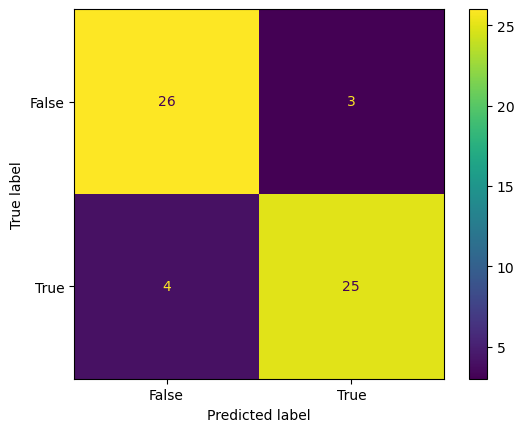

In [29]:
import matplotlib.pyplot as plt
from sklearn import metrics

confusion_matrix = metrics.confusion_matrix(y_train, knn.predict(X_train))

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])

cm_display.plot()
plt.show()

In [30]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
logreg = LogisticRegression(max_iter=1000000)
logreg.fit(X_train, y_train)
print('Accuracy of logistic regression classifier on test set: {:.4f}'.format(logreg.score(X_test, y_test)))


Accuracy of logistic regression classifier on test set: 0.6207


c:\Users\aikyn\miniconda3\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
